In [1]:
import numpy as np  
import matplotlib.pyplot as plt
import gendata
import torch
from models.wdgrl_ae import *
from tqdm.auto import trange

c:\Users\Asus\anaconda3\envs\dann\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
def clustering(
        X, 
        n_cluster: int = 3):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    labels = kmeans.fit_predict(X)
    return labels, kmeans

## Gen data

In [3]:
ns, nt, d = 1500, 100, 16

In [4]:
from random import randint
seed = randint(0, 2**32 - 1)
# seed = None
print("Randomly choose seed =",seed)


Randomly choose seed = 1892708732


In [90]:
Xs, Ys, Xt, Yt, info = gendata.gen_domain_adaptation_data(
    n_source=ns,
    n_target=nt,
    n_features=d,
    n_clusters=3,
    domain_shift_type="concept",
    shift_magnitude=1.0,  # Moderate shift
    noise_ratio=0.0,
    random_state=1700506300,
    base_center = (-1.5,1.5),
    cluster_std_source = 1,
    cluster_std_target = 1,
)

Fixed andom seed = 1700506300


In [91]:
Xs[0]

array([-1.66074201,  0.97276397, -0.39412241, -0.90475098,  1.38183836,
       -1.50423969, -0.00832035,  0.31382345, -0.18103252,  2.20132183,
        0.95167713,  0.6300823 ,  0.65506739, -1.1943794 , -1.28991577,
       -0.71325611])

## TSNE 2d plot

Running t-SNE dimensionality reduction...


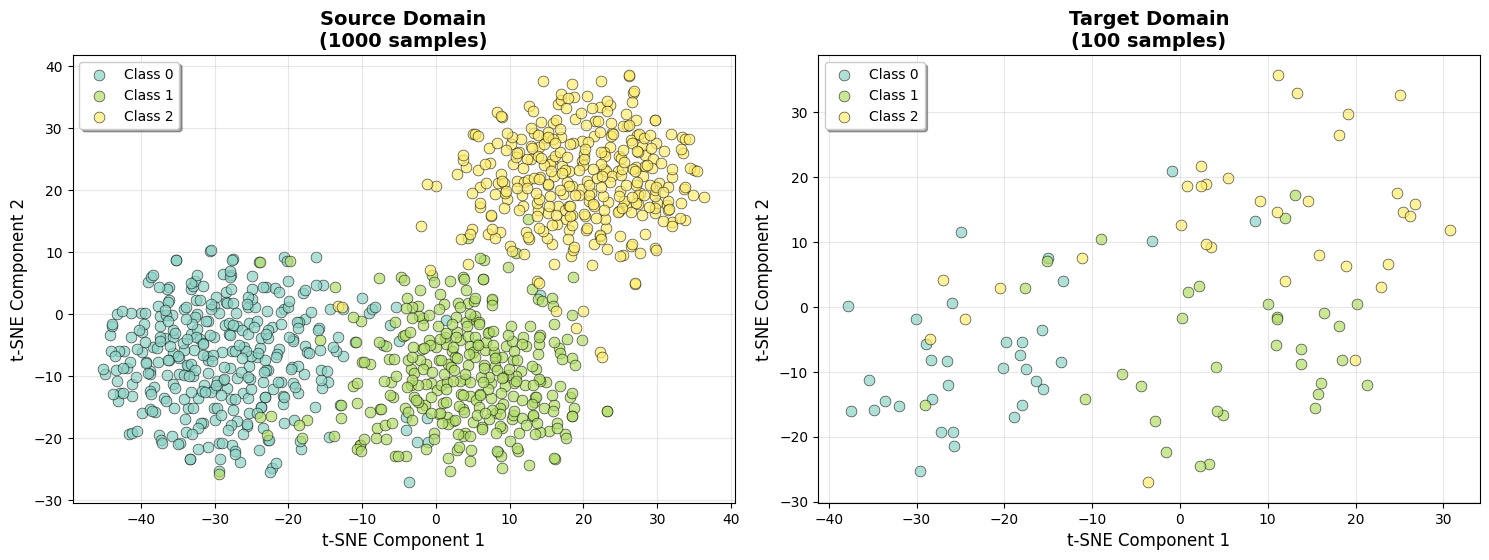

In [92]:
gendata.visualby_tsne(Xs,Xt,Ys,Yt)

## Original clustering

In [93]:

cluster_labels, model1 = clustering(Xt)

ari = adjusted_rand_score(Yt, cluster_labels)
print(f'Adjusted Rand Index (ARI) only on target domain: {ari:.4f}')

Adjusted Rand Index (ARI) only on target domain: 0.5996


___

In [94]:
xs = torch.from_numpy(Xs).float()
ys = torch.from_numpy(Ys).long()
xt = torch.from_numpy(Xt).float()
yt = torch.from_numpy(Yt).long()

In [95]:
from torch.utils.data import DataLoader, TensorDataset

source_dataset = TensorDataset(xs)
target_dataset = TensorDataset(xt)



## WDGRL

In [96]:
encoder_hidden_dims = [32]
decoder_hidden_dims = [32]
critic_hidden_dims = [10,10]
model = WDGRL(
    input_dim=d, 
    encoder_hidden_dims=encoder_hidden_dims,
    critic_hidden_dims=critic_hidden_dims,
    decoder_hidden_dims= decoder_hidden_dims,
    use_decoder=True,
    alpha1 = 1e-3,
    alpha2 = 1e-3,
    seed=42)

losses = model.train(
    source_dataset, 
    target_dataset,
    num_epochs=200,
    gamma=1,
    lambda_=1,
    dc_iter= 10,
    with_decoder=True,
    batch_size=32,
    verbose=True
    )

Epoch:   1%|          | 2/200 [00:00<00:10, 18.37it/s]

Epoch 1/200 | Loss: 0.05352063477039337
Epoch 2/200 | Loss: 0.05773519352078438
Epoch 3/200 | Loss: 0.05370501056313515
Epoch 4/200 | Loss: 0.0517057441174984
Epoch 5/200 | Loss: 0.06319541484117508


Epoch:   4%|▍         | 8/200 [00:00<00:09, 21.28it/s]

Epoch 6/200 | Loss: 0.05777592584490776
Epoch 7/200 | Loss: 0.05176110565662384
Epoch 8/200 | Loss: 0.053658634424209595
Epoch 9/200 | Loss: 0.05826259404420853
Epoch 10/200 | Loss: 0.05017509311437607


Epoch:   7%|▋         | 14/200 [00:00<00:08, 21.94it/s]

Epoch 11/200 | Loss: 0.05222390219569206
Epoch 12/200 | Loss: 0.05656164139509201
Epoch 13/200 | Loss: 0.051903750747442245
Epoch 14/200 | Loss: 0.05664834752678871
Epoch 15/200 | Loss: 0.05666802451014519


Epoch:  10%|█         | 20/200 [00:00<00:07, 22.62it/s]

Epoch 16/200 | Loss: 0.05905994772911072
Epoch 17/200 | Loss: 0.052283935248851776
Epoch 18/200 | Loss: 0.06085038185119629
Epoch 19/200 | Loss: 0.05993367359042168
Epoch 20/200 | Loss: 0.05696887522935867
Epoch 21/200 | Loss: 0.059091366827487946


Epoch:  13%|█▎        | 26/200 [00:01<00:07, 24.25it/s]

Epoch 22/200 | Loss: 0.05532373487949371
Epoch 23/200 | Loss: 0.06462278217077255
Epoch 24/200 | Loss: 0.05000414326786995
Epoch 25/200 | Loss: 0.05745737999677658
Epoch 26/200 | Loss: 0.05208011716604233
Epoch 27/200 | Loss: 0.04514997825026512


Epoch:  16%|█▌        | 32/200 [00:01<00:06, 25.43it/s]

Epoch 28/200 | Loss: 0.052119843661785126
Epoch 29/200 | Loss: 0.05147629603743553
Epoch 30/200 | Loss: 0.059314679354429245
Epoch 31/200 | Loss: 0.048032332211732864
Epoch 32/200 | Loss: 0.05315667763352394
Epoch 33/200 | Loss: 0.0560855008661747


Epoch:  19%|█▉        | 38/200 [00:01<00:06, 25.98it/s]

Epoch 34/200 | Loss: 0.05888599902391434
Epoch 35/200 | Loss: 0.06465835869312286
Epoch 36/200 | Loss: 0.06030209735035896
Epoch 37/200 | Loss: 0.05658842995762825
Epoch 38/200 | Loss: 0.041793107986450195
Epoch 39/200 | Loss: 0.049145590513944626


Epoch:  22%|██▏       | 44/200 [00:01<00:05, 26.26it/s]

Epoch 40/200 | Loss: 0.05598992109298706
Epoch 41/200 | Loss: 0.06092721223831177
Epoch 42/200 | Loss: 0.06121750921010971
Epoch 43/200 | Loss: 0.05910657346248627
Epoch 44/200 | Loss: 0.04531697928905487
Epoch 45/200 | Loss: 0.055664680898189545


Epoch:  25%|██▌       | 50/200 [00:02<00:05, 25.73it/s]

Epoch 46/200 | Loss: 0.047945525497198105
Epoch 47/200 | Loss: 0.05006994307041168
Epoch 48/200 | Loss: 0.05763542652130127
Epoch 49/200 | Loss: 0.04551996290683746
Epoch 50/200 | Loss: 0.06250248104333878
Epoch 51/200 | Loss: 0.04695618525147438


Epoch:  28%|██▊       | 56/200 [00:02<00:05, 24.23it/s]

Epoch 52/200 | Loss: 0.05391863361001015
Epoch 53/200 | Loss: 0.06011631339788437
Epoch 54/200 | Loss: 0.05929701030254364
Epoch 55/200 | Loss: 0.05206287279725075
Epoch 56/200 | Loss: 0.06001179665327072


Epoch:  30%|██▉       | 59/200 [00:02<00:05, 24.38it/s]

Epoch 57/200 | Loss: 0.056911587715148926
Epoch 58/200 | Loss: 0.048381417989730835
Epoch 59/200 | Loss: 0.05432557314634323
Epoch 60/200 | Loss: 0.05175410211086273
Epoch 61/200 | Loss: 0.04795928671956062


Epoch:  32%|███▎      | 65/200 [00:02<00:05, 24.68it/s]

Epoch 62/200 | Loss: 0.053949132561683655
Epoch 63/200 | Loss: 0.04941300302743912
Epoch 64/200 | Loss: 0.04855968430638313
Epoch 65/200 | Loss: 0.0525985062122345
Epoch 66/200 | Loss: 0.05068815127015114
Epoch 67/200 | Loss: 0.054381661117076874


Epoch:  36%|███▌      | 71/200 [00:02<00:04, 25.86it/s]

Epoch 68/200 | Loss: 0.051769331097602844
Epoch 69/200 | Loss: 0.054423704743385315
Epoch 70/200 | Loss: 0.05142970010638237
Epoch 71/200 | Loss: 0.05126268416643143
Epoch 72/200 | Loss: 0.048797931522130966
Epoch 73/200 | Loss: 0.06153424084186554


Epoch:  38%|███▊      | 77/200 [00:03<00:04, 25.50it/s]

Epoch 74/200 | Loss: 0.05172738805413246
Epoch 75/200 | Loss: 0.04985897243022919
Epoch 76/200 | Loss: 0.047754839062690735
Epoch 77/200 | Loss: 0.05024803429841995
Epoch 78/200 | Loss: 0.058104559779167175
Epoch 79/200 | Loss: 0.046630483120679855


Epoch:  42%|████▏     | 83/200 [00:03<00:04, 25.02it/s]

Epoch 80/200 | Loss: 0.04689228534698486
Epoch 81/200 | Loss: 0.05008017271757126
Epoch 82/200 | Loss: 0.05107375234365463
Epoch 83/200 | Loss: 0.05353480577468872
Epoch 84/200 | Loss: 0.04866267368197441
Epoch 85/200 | Loss: 0.0516744963824749


Epoch:  44%|████▍     | 89/200 [00:03<00:04, 24.05it/s]

Epoch 86/200 | Loss: 0.043361812829971313
Epoch 87/200 | Loss: 0.05277308076620102
Epoch 88/200 | Loss: 0.050255872309207916
Epoch 89/200 | Loss: 0.04460018873214722
Epoch 90/200 | Loss: 0.04298718646168709


Epoch:  48%|████▊     | 95/200 [00:03<00:04, 24.72it/s]

Epoch 91/200 | Loss: 0.0408439040184021
Epoch 92/200 | Loss: 0.047825053334236145
Epoch 93/200 | Loss: 0.04391348361968994
Epoch 94/200 | Loss: 0.04575147107243538
Epoch 95/200 | Loss: 0.04969204589724541
Epoch 96/200 | Loss: 0.03803379833698273


Epoch:  50%|█████     | 101/200 [00:04<00:03, 25.16it/s]

Epoch 97/200 | Loss: 0.03715626522898674
Epoch 98/200 | Loss: 0.044646840542554855
Epoch 99/200 | Loss: 0.04748062044382095
Epoch 100/200 | Loss: 0.0456179678440094
Epoch 101/200 | Loss: 0.03972714766860008
Epoch 102/200 | Loss: 0.03999718278646469


Epoch:  52%|█████▏    | 104/200 [00:04<00:04, 23.10it/s]

Epoch 103/200 | Loss: 0.0433407686650753
Epoch 104/200 | Loss: 0.04333791136741638
Epoch 105/200 | Loss: 0.04335830360651016
Epoch 106/200 | Loss: 0.03749808669090271


Epoch:  55%|█████▌    | 110/200 [00:04<00:04, 22.19it/s]

Epoch 107/200 | Loss: 0.03795158118009567
Epoch 108/200 | Loss: 0.03469299152493477
Epoch 109/200 | Loss: 0.04012221097946167
Epoch 110/200 | Loss: 0.03787926957011223
Epoch 111/200 | Loss: 0.034164924174547195


Epoch:  58%|█████▊    | 116/200 [00:04<00:03, 23.53it/s]

Epoch 112/200 | Loss: 0.035817455500364304
Epoch 113/200 | Loss: 0.041931405663490295
Epoch 114/200 | Loss: 0.039329785853624344
Epoch 115/200 | Loss: 0.038839295506477356
Epoch 116/200 | Loss: 0.039680738002061844
Epoch 117/200 | Loss: 0.03648395836353302


Epoch:  61%|██████    | 122/200 [00:05<00:03, 23.79it/s]

Epoch 118/200 | Loss: 0.03413987532258034
Epoch 119/200 | Loss: 0.043220069259405136
Epoch 120/200 | Loss: 0.03835820406675339
Epoch 121/200 | Loss: 0.03238414227962494
Epoch 122/200 | Loss: 0.03357953578233719


Epoch:  62%|██████▎   | 125/200 [00:05<00:03, 24.31it/s]

Epoch 123/200 | Loss: 0.03901214897632599
Epoch 124/200 | Loss: 0.03765193372964859
Epoch 125/200 | Loss: 0.03937727212905884
Epoch 126/200 | Loss: 0.038708146661520004
Epoch 127/200 | Loss: 0.02964462712407112
Epoch 128/200 | Loss: 0.03910068795084953


Epoch:  66%|██████▌   | 131/200 [00:05<00:02, 24.03it/s]

Epoch 129/200 | Loss: 0.03797240927815437
Epoch 130/200 | Loss: 0.038881074637174606
Epoch 131/200 | Loss: 0.03914661705493927
Epoch 132/200 | Loss: 0.03434860333800316
Epoch 133/200 | Loss: 0.03476375713944435
Epoch 134/200 | Loss: 0.03453230857849121


Epoch:  68%|██████▊   | 137/200 [00:05<00:02, 24.55it/s]

Epoch 135/200 | Loss: 0.0341721773147583
Epoch 136/200 | Loss: 0.03812933340668678
Epoch 137/200 | Loss: 0.04053105413913727
Epoch 138/200 | Loss: 0.03741779550909996
Epoch 139/200 | Loss: 0.03703426942229271


Epoch:  72%|███████▏  | 143/200 [00:05<00:02, 24.80it/s]

Epoch 140/200 | Loss: 0.04138850420713425
Epoch 141/200 | Loss: 0.03680899739265442
Epoch 142/200 | Loss: 0.03814851865172386
Epoch 143/200 | Loss: 0.03841865807771683
Epoch 144/200 | Loss: 0.03416938707232475
Epoch 145/200 | Loss: 0.03710303083062172


Epoch:  74%|███████▍  | 149/200 [00:06<00:02, 25.11it/s]

Epoch 146/200 | Loss: 0.034218546003103256
Epoch 147/200 | Loss: 0.03132050856947899
Epoch 148/200 | Loss: 0.0396762453019619
Epoch 149/200 | Loss: 0.03624289482831955
Epoch 150/200 | Loss: 0.03128672018647194
Epoch 151/200 | Loss: 0.03009876236319542


Epoch:  78%|███████▊  | 155/200 [00:06<00:01, 24.63it/s]

Epoch 152/200 | Loss: 0.03450366109609604
Epoch 153/200 | Loss: 0.03755531460046768
Epoch 154/200 | Loss: 0.030049579218029976
Epoch 155/200 | Loss: 0.02871593087911606
Epoch 156/200 | Loss: 0.034361377358436584


Epoch:  80%|████████  | 161/200 [00:06<00:01, 24.58it/s]

Epoch 157/200 | Loss: 0.031124642118811607
Epoch 158/200 | Loss: 0.029719043523073196
Epoch 159/200 | Loss: 0.03709738701581955
Epoch 160/200 | Loss: 0.03461844474077225
Epoch 161/200 | Loss: 0.036940798163414


Epoch:  82%|████████▏ | 164/200 [00:06<00:01, 25.22it/s]

Epoch 162/200 | Loss: 0.03490544110536575
Epoch 163/200 | Loss: 0.030439820140600204
Epoch 164/200 | Loss: 0.033995117992162704
Epoch 165/200 | Loss: 0.032542578876018524
Epoch 166/200 | Loss: 0.0351676270365715
Epoch 167/200 | Loss: 0.04172392562031746


Epoch:  85%|████████▌ | 170/200 [00:06<00:01, 25.30it/s]

Epoch 168/200 | Loss: 0.0424007847905159
Epoch 169/200 | Loss: 0.029207734391093254
Epoch 170/200 | Loss: 0.02622726932168007
Epoch 171/200 | Loss: 0.03583993390202522
Epoch 172/200 | Loss: 0.03714612126350403
Epoch 173/200 | Loss: 0.030291948467493057


Epoch:  88%|████████▊ | 176/200 [00:07<00:00, 25.24it/s]

Epoch 174/200 | Loss: 0.03308191895484924
Epoch 175/200 | Loss: 0.023457316681742668
Epoch 176/200 | Loss: 0.03374868631362915
Epoch 177/200 | Loss: 0.025544114410877228
Epoch 178/200 | Loss: 0.028695715591311455
Epoch 179/200 | Loss: 0.02858395129442215


Epoch:  91%|█████████ | 182/200 [00:07<00:00, 25.98it/s]

Epoch 180/200 | Loss: 0.02806190401315689
Epoch 181/200 | Loss: 0.033808425068855286
Epoch 182/200 | Loss: 0.029127832502126694
Epoch 183/200 | Loss: 0.02978302538394928
Epoch 184/200 | Loss: 0.02977561019361019
Epoch 185/200 | Loss: 0.02843143604695797


Epoch:  94%|█████████▍| 188/200 [00:07<00:00, 26.12it/s]

Epoch 186/200 | Loss: 0.027897197753190994
Epoch 187/200 | Loss: 0.029013101011514664
Epoch 188/200 | Loss: 0.030879955738782883
Epoch 189/200 | Loss: 0.03100326843559742
Epoch 190/200 | Loss: 0.033056601881980896


Epoch:  97%|█████████▋| 194/200 [00:07<00:00, 25.96it/s]

Epoch 191/200 | Loss: 0.03797675669193268
Epoch 192/200 | Loss: 0.029983175918459892
Epoch 193/200 | Loss: 0.03684195131063461
Epoch 194/200 | Loss: 0.030918221920728683
Epoch 195/200 | Loss: 0.028185486793518066
Epoch 196/200 | Loss: 0.02661774680018425


Epoch: 100%|██████████| 200/200 [00:08<00:00, 24.61it/s]

Epoch 197/200 | Loss: 0.040182098746299744
Epoch 198/200 | Loss: 0.029504386708140373
Epoch 199/200 | Loss: 0.03833669796586037
Epoch 200/200 | Loss: 0.032891642302274704


In [97]:
xs_hat = model.extract_feature(xs.cuda())
xt_hat = model.extract_feature(xt.cuda())
xs_hat = xs_hat.cpu().numpy()
xt_hat = xt_hat.cpu().numpy()
print(xs_hat.shape)
print(xt_hat.shape)

(1500, 32)
(100, 32)


In [98]:
x_comb = np.vstack((xs_hat, xt_hat))
comb_cluster_labels, model2 = clustering(x_comb)
ari = adjusted_rand_score(Yt, comb_cluster_labels[ns:])
print(f'Adjusted Rand Index (ARI) of target on transported domain: {ari:.4f}')

Adjusted Rand Index (ARI) of target on transported domain: 0.3506


Running t-SNE dimensionality reduction...


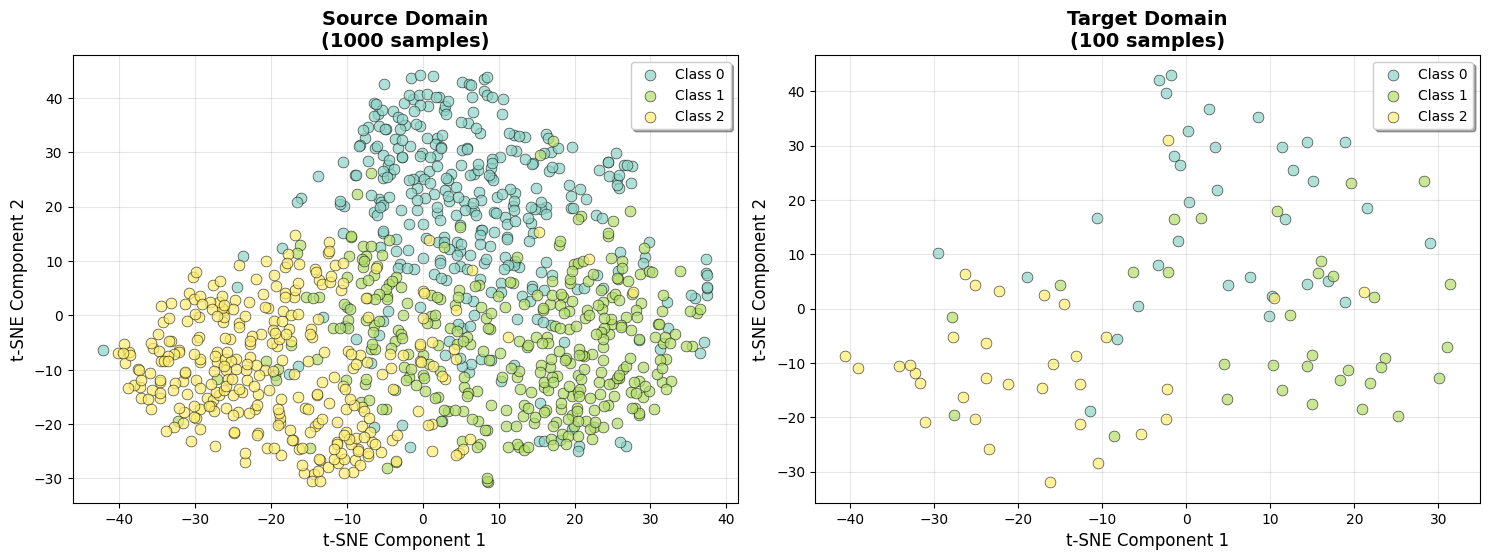

In [99]:
gendata.visualby_tsne(xs_hat, xt_hat, Ys, Yt)

## Fine-tune hyperparams

In [100]:
n_source_small = 800
n_target_small = 80

# Randomly pick indices without replacement
src_indices = torch.randperm(len(xs))[:n_source_small]
tgt_indices = torch.randperm(len(xt))[:n_target_small]

# Create smaller tensors
xs_small = xs[src_indices]
xt_small = xt[tgt_indices]

# Subset labels (Ys, Yt are numpy arrays)
Ys_small = Ys[src_indices.cpu().numpy()]
Yt_small = Yt[tgt_indices.cpu().numpy()]

# Create smaller datasets
source_dataset_small = TensorDataset(xs_small)
target_dataset_small = TensorDataset(xt_small)

In [101]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [102]:
import numpy as np
from sklearn.metrics import adjusted_rand_score

def objective(trial):
    # Hyperparameter search space
    # encoder_hidden_dims = trial.suggest_categorical("encoder_hidden_dims", [[32], [10,10], [32,16]])
    # critic_hidden_dims  = trial.suggest_categorical("critic_hidden_dims", [[10, 10], [32,16], [32]])
    
    n_encoder_layers = trial.suggest_int("n_encoder_layers", 1, 2)
    encoder_hidden_dims = []
    for i in range(n_encoder_layers):
        # Suggest the number of nodes for each encoder layer
        dim = trial.suggest_int(f"encoder_dim_l{i}", d//2, d*2, log=True)
        encoder_hidden_dims.append(dim)
    # This is the line you need to add for the encoder
    trial.set_user_attr("encoder_hidden_dims", encoder_hidden_dims)
    
    # n_decoder_layers = trial.suggest_int("n_decoder_layers", 0, 2)
    # decoder_hidden_dims = []
    # for i in range(n_decoder_layers):
    #     dim = trial.suggest_int(f"decoder_dim_l{i}", d//2, d*2, log=True)
    #     decoder_hidden_dims.append(dim)
    decoder_hidden_dims = encoder_hidden_dims[::-1]
    trial.set_user_attr("decoder_hidden_dims", decoder_hidden_dims)


    # --- Critic Architecture Tuning ---
    # Suggest the number of hidden layers for the critic
    n_critic_layers = trial.suggest_int("n_critic_layers", 1, 3)
    critic_hidden_dims = []
    for i in range(n_critic_layers):
        # Suggest the number of nodes for each critic layer
        dim = trial.suggest_int(f"critic_dim_l{i}", d//2, d*2, log=True)
        critic_hidden_dims.append(dim)
    # This is the line you need to add for the critic
    trial.set_user_attr("critic_hidden_dims", critic_hidden_dims)

    
    # alpha2 = 1e-3
    # alpha1 = 1e-3
    
    alpha2 = trial.suggest_float("alpha2", 1e-3, 1e-3, log=True)
    alpha1  = trial.suggest_float("alpha1", 1e-3, 1e-3, log=True)
    gamma = trial.suggest_float("gamma", 0.01, 8.0)
    lambda_ = trial.suggest_float("lambda_", 0.01, 8.0)
    dc_iter = trial.suggest_int("dc_iter", 5, 15)
    batch_size = trial.suggest_categorical("batch_size", [32, 64])

    # Build WDGRL tune_model
    tune_model = WDGRL(
        input_dim=d,
        encoder_hidden_dims=encoder_hidden_dims,
        decoder_hidden_dims=decoder_hidden_dims,
        critic_hidden_dims=critic_hidden_dims,
        use_decoder=True,
        alpha2=alpha2,
        alpha1=alpha1,
        seed=42
    )
    tune_model.encoder = tune_model.encoder.float()
    tune_model.critic = tune_model.critic.float()

    # Train (shorter epochs for tuning)
    loss = tune_model.train(
        source_dataset_small, 
        target_dataset_small,
        num_epochs=50,
        with_decoder=True,
        gamma=gamma,
        lambda_= lambda_,
        dc_iter=dc_iter,
        batch_size=batch_size
    )

    xs_small_hat = tune_model.extract_feature(xs_small.cuda())
    xt_small_hat = tune_model.extract_feature(xt_small.cuda())
    xs_small_hat = xs_small_hat.cpu().numpy()
    xt_small_hat = xt_small_hat.cpu().numpy()
    
    # Combine and cluster
    x_small_comb = np.vstack((xs_small_hat, xt_small_hat))
    comb_sm_cluster_labels, _ = clustering(x_small_comb)
    print("Loss: ",loss["loss"][-1])
    # Compute ARI on transported target domain
    ari = adjusted_rand_score(Yt_small, comb_sm_cluster_labels[len(xs_small_hat):])
    return ari  # Optuna will maximize this


In [103]:
import optuna

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40)

print("Best params:", study.best_params)
print("Best ARI:", study.best_value)

[I 2025-08-13 08:59:13,357] A new study created in memory with name: no-name-75309e99-c5a2-4cf2-a555-046d002a0e8a
Epoch: 100%|██████████| 50/50 [00:02<00:00, 23.03it/s]
[I 2025-08-13 08:59:15,550] Trial 0 finished with value: 0.0935476788050489 and parameters: {'n_encoder_layers': 2, 'encoder_dim_l0': 22, 'encoder_dim_l1': 13, 'n_critic_layers': 3, 'critic_dim_l0': 24, 'critic_dim_l1': 10, 'critic_dim_l2': 28, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 6.086686567964007, 'lambda_': 5.433663546322457, 'dc_iter': 8, 'batch_size': 32}. Best is trial 0 with value: 0.0935476788050489.


Loss:  0.028772415593266487


Epoch: 100%|██████████| 50/50 [00:00<00:00, 53.96it/s]
[I 2025-08-13 08:59:16,495] Trial 1 finished with value: 0.05098802854170086 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 23, 'n_critic_layers': 1, 'critic_dim_l0': 31, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 5.461838902261918, 'lambda_': 0.3947811412262747, 'dc_iter': 5, 'batch_size': 64}. Best is trial 0 with value: 0.0935476788050489.


Loss:  0.01903284713625908


Epoch: 100%|██████████| 50/50 [00:02<00:00, 21.75it/s]
[I 2025-08-13 08:59:18,825] Trial 2 finished with value: 0.11378913071409698 and parameters: {'n_encoder_layers': 2, 'encoder_dim_l0': 8, 'encoder_dim_l1': 13, 'n_critic_layers': 3, 'critic_dim_l0': 17, 'critic_dim_l1': 22, 'critic_dim_l2': 12, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 5.839880584079428, 'lambda_': 5.443135682932713, 'dc_iter': 9, 'batch_size': 64}. Best is trial 2 with value: 0.11378913071409698.


Loss:  0.02398265339434147


Epoch: 100%|██████████| 50/50 [00:01<00:00, 36.06it/s]
[I 2025-08-13 08:59:20,229] Trial 3 finished with value: 0.07513665353307201 and parameters: {'n_encoder_layers': 2, 'encoder_dim_l0': 29, 'encoder_dim_l1': 14, 'n_critic_layers': 3, 'critic_dim_l0': 11, 'critic_dim_l1': 13, 'critic_dim_l2': 31, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 6.363134673619362, 'lambda_': 5.373931618671375, 'dc_iter': 5, 'batch_size': 32}. Best is trial 2 with value: 0.11378913071409698.


Loss:  0.02661525458097458


Epoch: 100%|██████████| 50/50 [00:02<00:00, 19.00it/s]
[I 2025-08-13 08:59:22,880] Trial 4 finished with value: 0.09834775094239578 and parameters: {'n_encoder_layers': 2, 'encoder_dim_l0': 18, 'encoder_dim_l1': 11, 'n_critic_layers': 2, 'critic_dim_l0': 9, 'critic_dim_l1': 15, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 0.4651331300644654, 'lambda_': 4.109200981600303, 'dc_iter': 13, 'batch_size': 32}. Best is trial 2 with value: 0.11378913071409698.


Loss:  0.041850313544273376


Epoch: 100%|██████████| 50/50 [00:02<00:00, 21.24it/s]
[I 2025-08-13 08:59:25,255] Trial 5 finished with value: 0.055857808906398736 and parameters: {'n_encoder_layers': 2, 'encoder_dim_l0': 17, 'encoder_dim_l1': 19, 'n_critic_layers': 2, 'critic_dim_l0': 13, 'critic_dim_l1': 8, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 4.3317689895002935, 'lambda_': 3.8439988058587513, 'dc_iter': 11, 'batch_size': 64}. Best is trial 2 with value: 0.11378913071409698.


Loss:  0.02289409749209881


Epoch: 100%|██████████| 50/50 [00:02<00:00, 18.87it/s]
[I 2025-08-13 08:59:27,921] Trial 6 finished with value: 0.31843894271674356 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 32, 'n_critic_layers': 2, 'critic_dim_l0': 24, 'critic_dim_l1': 22, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 3.7798026622047662, 'lambda_': 3.9371128273876743, 'dc_iter': 14, 'batch_size': 32}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.13145855069160461


Epoch: 100%|██████████| 50/50 [00:01<00:00, 31.42it/s]
[I 2025-08-13 08:59:29,537] Trial 7 finished with value: 0.10986924436111847 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 21, 'n_critic_layers': 2, 'critic_dim_l0': 29, 'critic_dim_l1': 18, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 4.419050219443013, 'lambda_': 2.2211816595452887, 'dc_iter': 8, 'batch_size': 32}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.04702427238225937


Epoch: 100%|██████████| 50/50 [00:01<00:00, 33.01it/s]
[I 2025-08-13 08:59:31,073] Trial 8 finished with value: -0.012448980539471301 and parameters: {'n_encoder_layers': 2, 'encoder_dim_l0': 13, 'encoder_dim_l1': 8, 'n_critic_layers': 2, 'critic_dim_l0': 12, 'critic_dim_l1': 31, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 2.6800308306298013, 'lambda_': 5.187169485307292, 'dc_iter': 7, 'batch_size': 64}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.025388328358530998


Epoch: 100%|██████████| 50/50 [00:02<00:00, 22.85it/s]
[I 2025-08-13 08:59:33,280] Trial 9 finished with value: 0.033666450799013536 and parameters: {'n_encoder_layers': 2, 'encoder_dim_l0': 30, 'encoder_dim_l1': 30, 'n_critic_layers': 2, 'critic_dim_l0': 11, 'critic_dim_l1': 24, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 4.649619644670593, 'lambda_': 7.570998782933449, 'dc_iter': 11, 'batch_size': 32}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.014939770102500916


Epoch: 100%|██████████| 50/50 [00:02<00:00, 22.67it/s]
[I 2025-08-13 08:59:35,522] Trial 10 finished with value: 0.07989395746903093 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 10, 'n_critic_layers': 1, 'critic_dim_l0': 19, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 2.455863479285788, 'lambda_': 7.929783255970351, 'dc_iter': 15, 'batch_size': 32}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.05851714313030243


Epoch: 100%|██████████| 50/50 [00:03<00:00, 14.04it/s]
[I 2025-08-13 08:59:39,123] Trial 11 finished with value: 0.10257226099608897 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 8, 'n_critic_layers': 3, 'critic_dim_l0': 18, 'critic_dim_l1': 21, 'critic_dim_l2': 9, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 7.715297984381367, 'lambda_': 2.716053986754546, 'dc_iter': 15, 'batch_size': 64}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.023525966331362724


Epoch: 100%|██████████| 50/50 [00:03<00:00, 15.18it/s]
[I 2025-08-13 08:59:42,468] Trial 12 finished with value: 0.10027715636857903 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 13, 'n_critic_layers': 3, 'critic_dim_l0': 22, 'critic_dim_l1': 29, 'critic_dim_l2': 12, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 2.7000424180913796, 'lambda_': 5.8919649073959, 'dc_iter': 13, 'batch_size': 64}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.030106034129858017


Epoch: 100%|██████████| 50/50 [00:01<00:00, 30.81it/s]
[I 2025-08-13 08:59:44,135] Trial 13 finished with value: 0.041979325573732656 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 8, 'n_critic_layers': 1, 'critic_dim_l0': 15, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 7.641313986386316, 'lambda_': 6.5064492464484935, 'dc_iter': 10, 'batch_size': 64}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.022482171654701233


Epoch: 100%|██████████| 50/50 [00:06<00:00,  7.87it/s]
[I 2025-08-13 08:59:50,543] Trial 14 finished with value: 0.10022902018812731 and parameters: {'n_encoder_layers': 2, 'encoder_dim_l0': 11, 'encoder_dim_l1': 21, 'n_critic_layers': 3, 'critic_dim_l0': 25, 'critic_dim_l1': 22, 'critic_dim_l2': 16, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 3.3443928725242555, 'lambda_': 4.053259837780159, 'dc_iter': 10, 'batch_size': 32}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.03868889808654785


Epoch: 100%|██████████| 50/50 [00:06<00:00,  7.95it/s]
[I 2025-08-13 08:59:56,903] Trial 15 finished with value: 0.02981891677672668 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 13, 'n_critic_layers': 2, 'critic_dim_l0': 17, 'critic_dim_l1': 17, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 1.3406391683193588, 'lambda_': 2.7492724321286497, 'dc_iter': 13, 'batch_size': 64}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.027493219822645187


Epoch: 100%|██████████| 50/50 [00:04<00:00, 12.08it/s]
[I 2025-08-13 09:00:01,107] Trial 16 finished with value: 0.015323308852127909 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 10, 'n_critic_layers': 2, 'critic_dim_l0': 22, 'critic_dim_l1': 24, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 5.434039053840322, 'lambda_': 1.2822130148508637, 'dc_iter': 8, 'batch_size': 32}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.05215564742684364


Epoch: 100%|██████████| 50/50 [00:08<00:00,  5.67it/s]
[I 2025-08-13 09:00:10,007] Trial 17 finished with value: 0.0018485339010886172 and parameters: {'n_encoder_layers': 2, 'encoder_dim_l0': 26, 'encoder_dim_l1': 9, 'n_critic_layers': 3, 'critic_dim_l0': 14, 'critic_dim_l1': 13, 'critic_dim_l2': 17, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 6.71789612140538, 'lambda_': 6.75609525743722, 'dc_iter': 12, 'batch_size': 64}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.024301543831825256


Epoch: 100%|██████████| 50/50 [00:04<00:00, 11.05it/s]
[I 2025-08-13 09:00:14,607] Trial 18 finished with value: 0.03293355310045157 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 15, 'n_critic_layers': 1, 'critic_dim_l0': 8, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 3.5744723352651127, 'lambda_': 4.333140723303184, 'dc_iter': 9, 'batch_size': 32}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.03751584142446518


Epoch: 100%|██████████| 50/50 [00:07<00:00,  6.82it/s]
[I 2025-08-13 09:00:22,022] Trial 19 finished with value: 0.04969208903599265 and parameters: {'n_encoder_layers': 2, 'encoder_dim_l0': 19, 'encoder_dim_l1': 18, 'n_critic_layers': 2, 'critic_dim_l0': 20, 'critic_dim_l1': 19, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 5.309042467104035, 'lambda_': 3.2343180990059475, 'dc_iter': 14, 'batch_size': 64}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.022410321980714798


Epoch: 100%|██████████| 50/50 [00:05<00:00,  9.89it/s]
[I 2025-08-13 09:00:27,173] Trial 20 finished with value: 0.06736369120336716 and parameters: {'n_encoder_layers': 2, 'encoder_dim_l0': 32, 'encoder_dim_l1': 27, 'n_critic_layers': 3, 'critic_dim_l0': 27, 'critic_dim_l1': 26, 'critic_dim_l2': 8, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 1.66558106769874, 'lambda_': 4.670144802005686, 'dc_iter': 7, 'batch_size': 64}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.021667983382940292


Epoch: 100%|██████████| 50/50 [00:04<00:00, 10.93it/s]
[I 2025-08-13 09:00:31,823] Trial 21 finished with value: 0.045987256913922026 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 21, 'n_critic_layers': 2, 'critic_dim_l0': 31, 'critic_dim_l1': 18, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 4.7408932265063175, 'lambda_': 1.6900657575549625, 'dc_iter': 9, 'batch_size': 32}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.045013703405857086


Epoch: 100%|██████████| 50/50 [00:03<00:00, 16.30it/s]
[I 2025-08-13 09:00:34,992] Trial 22 finished with value: 0.04146615891618237 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 26, 'n_critic_layers': 2, 'critic_dim_l0': 28, 'critic_dim_l1': 20, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 3.6600022576339075, 'lambda_': 2.2073615032550276, 'dc_iter': 7, 'batch_size': 32}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.035935547202825546


Epoch: 100%|██████████| 50/50 [00:01<00:00, 26.71it/s]
[I 2025-08-13 09:00:36,914] Trial 23 finished with value: 0.15006858420313132 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 26, 'n_critic_layers': 2, 'critic_dim_l0': 21, 'critic_dim_l1': 16, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 4.283804689550989, 'lambda_': 3.259702375959309, 'dc_iter': 9, 'batch_size': 32}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.056429311633110046


Epoch: 100%|██████████| 50/50 [00:02<00:00, 23.87it/s]
[I 2025-08-13 09:00:39,061] Trial 24 finished with value: 0.04480927683856861 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 26, 'n_critic_layers': 2, 'critic_dim_l0': 16, 'critic_dim_l1': 15, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 7.155767055894591, 'lambda_': 3.2224087225294022, 'dc_iter': 10, 'batch_size': 32}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.03375595808029175


Epoch: 100%|██████████| 50/50 [00:01<00:00, 28.02it/s]
[I 2025-08-13 09:00:40,891] Trial 25 finished with value: 0.16845937412652617 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 32, 'n_critic_layers': 1, 'critic_dim_l0': 21, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 5.829418770613102, 'lambda_': 3.5170102696966077, 'dc_iter': 11, 'batch_size': 32}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.03454112261533737


Epoch: 100%|██████████| 50/50 [00:01<00:00, 25.49it/s]
[I 2025-08-13 09:00:42,894] Trial 26 finished with value: 0.1573446050991335 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 32, 'n_critic_layers': 1, 'critic_dim_l0': 21, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 5.046280576683174, 'lambda_': 3.4470671383603477, 'dc_iter': 12, 'batch_size': 32}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.06876835227012634


Epoch: 100%|██████████| 50/50 [00:01<00:00, 26.51it/s]
[I 2025-08-13 09:00:44,832] Trial 27 finished with value: 0.27904261403116104 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 31, 'n_critic_layers': 1, 'critic_dim_l0': 24, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 5.068263264207216, 'lambda_': 3.6243045258204925, 'dc_iter': 12, 'batch_size': 32}. Best is trial 6 with value: 0.31843894271674356.


Loss:  0.06743942946195602


Epoch: 100%|██████████| 50/50 [00:02<00:00, 22.79it/s]
[I 2025-08-13 09:00:47,081] Trial 28 finished with value: 0.3486787117945067 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 29, 'n_critic_layers': 1, 'critic_dim_l0': 24, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 6.76672184924932, 'lambda_': 4.520388040744145, 'dc_iter': 14, 'batch_size': 32}. Best is trial 28 with value: 0.3486787117945067.


Loss:  0.049018483608961105


Epoch: 100%|██████████| 50/50 [00:02<00:00, 23.01it/s]
[I 2025-08-13 09:00:49,299] Trial 29 finished with value: 0.09296349016720631 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 23, 'n_critic_layers': 1, 'critic_dim_l0': 26, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 6.789157656291321, 'lambda_': 4.660981553013267, 'dc_iter': 14, 'batch_size': 32}. Best is trial 28 with value: 0.3486787117945067.


Loss:  0.041370097547769547


Epoch: 100%|██████████| 50/50 [00:02<00:00, 21.19it/s]
[I 2025-08-13 09:00:51,701] Trial 30 finished with value: 0.134573626262807 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 28, 'n_critic_layers': 1, 'critic_dim_l0': 24, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 6.289895948921059, 'lambda_': 4.885829582144249, 'dc_iter': 14, 'batch_size': 32}. Best is trial 28 with value: 0.3486787117945067.


Loss:  0.05365395173430443


Epoch: 100%|██████████| 50/50 [00:02<00:00, 24.75it/s]
[I 2025-08-13 09:00:53,761] Trial 31 finished with value: 0.32822805355766055 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 32, 'n_critic_layers': 1, 'critic_dim_l0': 23, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 5.676552098164949, 'lambda_': 3.6862658977667264, 'dc_iter': 12, 'batch_size': 32}. Best is trial 28 with value: 0.3486787117945067.


Loss:  0.053510718047618866


Epoch: 100%|██████████| 50/50 [00:02<00:00, 24.09it/s]
[I 2025-08-13 09:00:55,885] Trial 32 finished with value: 0.3810603447531508 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 29, 'n_critic_layers': 1, 'critic_dim_l0': 24, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 7.1529619892611285, 'lambda_': 4.3861259151619905, 'dc_iter': 12, 'batch_size': 32}. Best is trial 32 with value: 0.3810603447531508.


Loss:  0.03276198357343674


Epoch: 100%|██████████| 50/50 [00:02<00:00, 23.44it/s]
[I 2025-08-13 09:00:58,065] Trial 33 finished with value: 0.16199779535599856 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 24, 'n_critic_layers': 1, 'critic_dim_l0': 23, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 7.240786237933255, 'lambda_': 5.675310210890146, 'dc_iter': 14, 'batch_size': 32}. Best is trial 32 with value: 0.3810603447531508.


Loss:  0.03388455510139465


Epoch: 100%|██████████| 50/50 [00:02<00:00, 24.42it/s]
[I 2025-08-13 09:01:00,163] Trial 34 finished with value: 0.10579497677288828 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 28, 'n_critic_layers': 1, 'critic_dim_l0': 30, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 7.940657640365119, 'lambda_': 6.1501153990522965, 'dc_iter': 13, 'batch_size': 32}. Best is trial 32 with value: 0.3810603447531508.


Loss:  0.05676136165857315


Epoch: 100%|██████████| 50/50 [00:02<00:00, 21.47it/s]
[I 2025-08-13 09:01:02,539] Trial 35 finished with value: 0.260848317625089 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 28, 'n_critic_layers': 1, 'critic_dim_l0': 32, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 5.967996707546224, 'lambda_': 4.396685031683333, 'dc_iter': 15, 'batch_size': 32}. Best is trial 32 with value: 0.3810603447531508.


Loss:  0.08467566967010498


Epoch: 100%|██████████| 50/50 [00:01<00:00, 26.00it/s]
[I 2025-08-13 09:01:04,510] Trial 36 finished with value: 0.07601676425280048 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 23, 'n_critic_layers': 1, 'critic_dim_l0': 19, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 6.677869350969957, 'lambda_': 5.025803143141094, 'dc_iter': 12, 'batch_size': 32}. Best is trial 32 with value: 0.3810603447531508.


Loss:  0.059664130210876465


Epoch: 100%|██████████| 50/50 [00:02<00:00, 24.97it/s]
[I 2025-08-13 09:01:06,559] Trial 37 finished with value: 0.22970382599638786 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 29, 'n_critic_layers': 1, 'critic_dim_l0': 27, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 7.343016597433774, 'lambda_': 0.5583667313652718, 'dc_iter': 13, 'batch_size': 32}. Best is trial 32 with value: 0.3810603447531508.


Loss:  0.04056866466999054


Epoch: 100%|██████████| 50/50 [00:02<00:00, 22.90it/s]
[I 2025-08-13 09:01:08,785] Trial 38 finished with value: 0.09329565885197846 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 20, 'n_critic_layers': 1, 'critic_dim_l0': 25, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 5.753620827800235, 'lambda_': 2.807856920715418, 'dc_iter': 14, 'batch_size': 32}. Best is trial 32 with value: 0.3810603447531508.


Loss:  0.05873733386397362


Epoch: 100%|██████████| 50/50 [00:01<00:00, 27.83it/s]
[I 2025-08-13 09:01:10,627] Trial 39 finished with value: 0.2042458025968824 and parameters: {'n_encoder_layers': 1, 'encoder_dim_l0': 24, 'n_critic_layers': 1, 'critic_dim_l0': 29, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 3.9365568630577275, 'lambda_': 3.972871172218777, 'dc_iter': 11, 'batch_size': 32}. Best is trial 32 with value: 0.3810603447531508.


Loss:  0.0523003488779068
Best params: {'n_encoder_layers': 1, 'encoder_dim_l0': 29, 'n_critic_layers': 1, 'critic_dim_l0': 24, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 7.1529619892611285, 'lambda_': 4.3861259151619905, 'dc_iter': 12, 'batch_size': 32}
Best ARI: 0.3810603447531508


In [104]:
print(study.best_params)

{'n_encoder_layers': 1, 'encoder_dim_l0': 29, 'n_critic_layers': 1, 'critic_dim_l0': 24, 'alpha2': 0.001, 'alpha1': 0.001, 'gamma': 7.1529619892611285, 'lambda_': 4.3861259151619905, 'dc_iter': 12, 'batch_size': 32}


In [105]:
# Assuming 'study' is your Optuna study object after optimization
best_trial = study.best_trial

print("Best Trial:")
print(f"  Value: {best_trial.value}")

print("\n  Directly Suggested Parameters:")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

print("\n  Dynamically Generated Architecture (User Attributes):")
for key, value in best_trial.user_attrs.items():
    print(f"    {key}: {value}")

Best Trial:
  Value: 0.3810603447531508

  Directly Suggested Parameters:
    n_encoder_layers: 1
    encoder_dim_l0: 29
    n_critic_layers: 1
    critic_dim_l0: 24
    alpha2: 0.001
    alpha1: 0.001
    gamma: 7.1529619892611285
    lambda_: 4.3861259151619905
    dc_iter: 12
    batch_size: 32

  Dynamically Generated Architecture (User Attributes):
    encoder_hidden_dims: [29]
    decoder_hidden_dims: [29]
    critic_hidden_dims: [24]


In [106]:
best_trial.user_attrs["critic_hidden_dims"]

[24]

In [107]:
best_params = study.best_params

final_model = WDGRL(
    input_dim=d,
    encoder_hidden_dims=best_trial.user_attrs["encoder_hidden_dims"],
    decoder_hidden_dims=best_trial.user_attrs["decoder_hidden_dims"],
    critic_hidden_dims=best_trial.user_attrs["critic_hidden_dims"],
    alpha2=best_params["alpha2"],
    alpha1=best_params["alpha1"],
    use_decoder=True,
    seed=42
)

# Train longer for final fit
log_loss = final_model.train(
    source_dataset,
    target_dataset,
    num_epochs=250,  # more epochs for final training
    gamma=best_params["gamma"],
    with_decoder=True,
    lambda_= best_params["lambda_"],
    dc_iter=best_params["dc_iter"],
    batch_size=best_params["batch_size"],
    verbose = False
)

Epoch: 100%|██████████| 250/250 [00:14<00:00, 16.84it/s]


In [108]:
xs_hat = final_model.extract_feature(xs.cuda())
xt_hat = final_model.extract_feature(xt.cuda())
xs_hat = xs_hat.cpu().numpy()
xt_hat = xt_hat.cpu().numpy()

Running t-SNE dimensionality reduction...


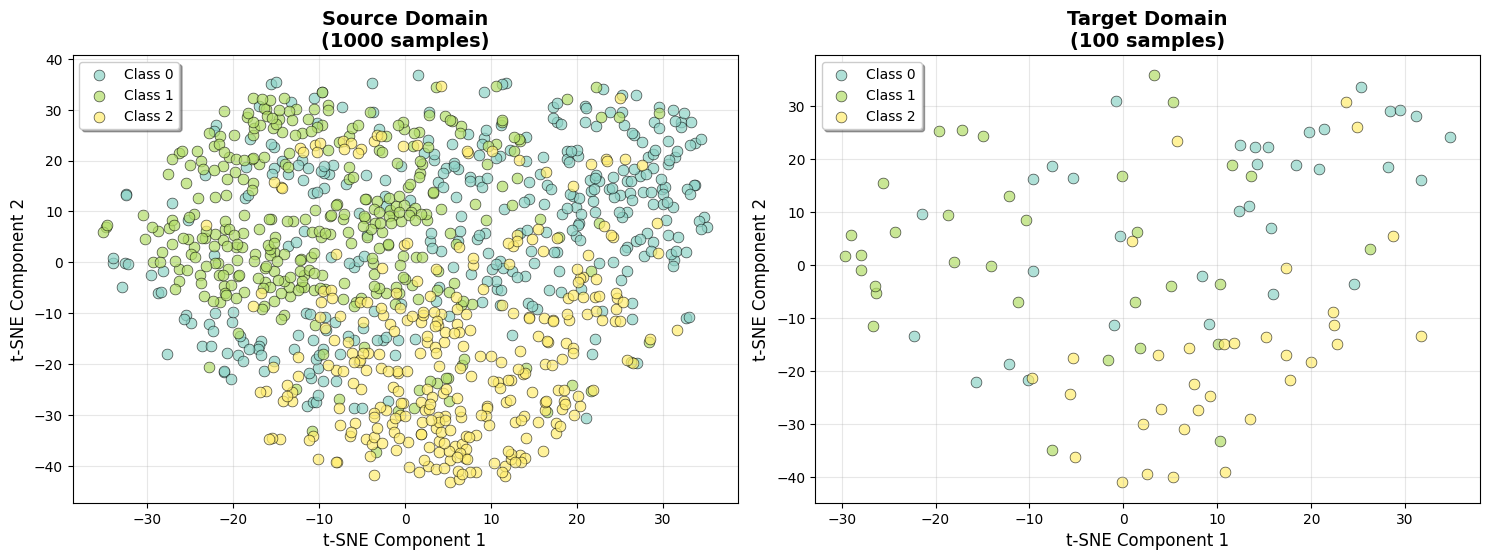

In [109]:
gendata.visualby_tsne(xs_hat, xt_hat, Ys, Yt)

In [110]:
x_comb = np.vstack((xs_hat, xt_hat))
comb_cluster_labels, model2 = clustering(x_comb)
ari = adjusted_rand_score(Yt, comb_cluster_labels[ns:])
print(f'Adjusted Rand Index (ARI) of target on transported domain: {ari:.4f}')

Adjusted Rand Index (ARI) of target on transported domain: 0.3091


In [111]:
total_loss = log_loss["loss"]
reconstructionloss = log_loss["decoder_loss"]

In [114]:
# epochs = range(1, len(total_loss) + 1)

# plt.figure(figsize=(14, 6))
# plt.plot(epochs, total_loss, linestyle='-', color='blue', label='Training Loss')

# plt.title('Loss over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.grid(True)
# plt.legend()
# plt.show()

In [115]:
# epochs_ = range(1, len(reconstructionloss) + 1)

# plt.figure(figsize=(15, 6))
# plt.plot(epochs, reconstructionloss, color='blue', label='Training Loss')

# plt.title('MSE over Epochs')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.grid(True)
# plt.legend()
# plt.show()